Intercept value  1771.80851064
coefficient  [ 28.77659574]


/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


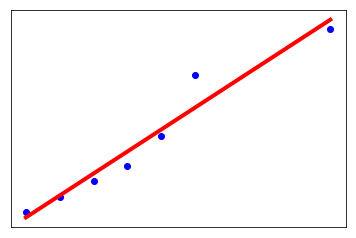

Predicted value:  [ 21915.42553191]


In [5]:
#!/usr/bin/env python
# predict_house_price.py
#Author : saimadhu
#Date: 05-Dec-2014
#About: Finding price of house using linear regression

# Required Packages
#import csv
#import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model


# Function for Fitting our data to Linear model
def linear_model_main(X_parameters,Y_parameters,predict_value):

	# Create linear regression object
	regr = linear_model.LinearRegression()
	regr.fit(X_parameters, Y_parameters)
	predict_outcome = regr.predict(predict_value)
	predictions = {}
	predictions['intercept'] = regr.intercept_
	predictions['coefficient'] = regr.coef_
	predictions['predicted_value'] = predict_outcome
	return predictions

# Function to show the resutls of  linear fit model
def show_linear_line(X_parameters,Y_parameters):
	# Create linear regression object
	regr = linear_model.LinearRegression()
	regr.fit(X_parameters, Y_parameters)
	plt.scatter(X_parameters,Y_parameters,color='blue')
	plt.plot(X_parameters,regr.predict(X_parameters),color='red',linewidth=4)
	plt.xticks(())
	plt.yticks(())
	plt.show()

# Function to get data
def get_data(file_name):
	data = pd.read_csv(file_name)
	X_parameter = []
	Y_parameter = []
	for single_square_feet ,single_price_value in zip(data['square_feet'],data['price']):
		X_parameter.append([float(single_square_feet)])
		Y_parameter.append(float(single_price_value))
	return X_parameter,Y_parameter

X,Y = get_data('AllHomes.csv')


predictvalue = 700
result = linear_model_main(X,Y,predictvalue)
print("Intercept value " , result['intercept'])
print("coefficient " , result['coefficient'])
show_linear_line(X,Y)
print("Predicted value: ",result['predicted_value'])

In [88]:
all_prices = pd.read_csv("zillow/Zip_ZriPerSqft_AllHomes.csv")

# Function to get data
def get_X_Y(data):
	X_parameter = []
	Y_parameter = []
	for single_square_feet ,single_price_value in zip(data['square_feet'],data['price']):
		X_parameter.append([float(single_square_feet)])
		Y_parameter.append(float(single_price_value))
	return X_parameter,Y_parameter

all_prices.head(n=2)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-11,2010-12,2011-01,...,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,4.394,4.380,4.364,4.366,4.360,4.352,4.346,4.362,4.376,4.396
1,84654,60657,Chicago,IL,Chicago,Cook,2,1.546,1.554,1.556,...,1.802,1.804,1.804,1.806,1.812,1.818,1.822,1.824,1.822,1.820


In [92]:
my_prices = all_prices[all_prices['RegionName'] == 10023].T.iloc[8:,:].reset_index()
my_prices.columns = ['date','rent']
my_prices = my_prices.reset_index()

my_prices = my_prices.fillna(value=0)
my_prices = my_prices[my_prices['rent'] > 0]

In [93]:
prices = my_prices['index']
l = list(prices)

X = []

for price in prices:
    X.append([price])
    

Y = list(my_prices['rent'])

Intercept value  3.83441663313
coefficient  [ 0.02171724]


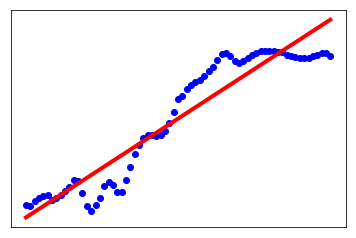

Predicted value:  [ 5.63694728]


In [94]:
predictvalue = 83
result = linear_model_main(X,Y,predictvalue)
print("Intercept value " , result['intercept'])
print("coefficient " , result['coefficient'])
show_linear_line(X,Y)
print("Predicted value: ",result['predicted_value'])